# Taller Modelos de Predicción

## Modelos sin Año y Mes

### Exploramos el dataset

In [79]:
# Importar librerías
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [80]:
# Lecura
ruta = '../semana_5/turistas_cartagena_data.csv'
data = pd.read_csv(ruta)

In [81]:
print(data.shape)
data.head()

(500, 10)


,Fecha,Número de Visitantes,Temperatura Media (°C),Precipitación (mm),Eventos Especiales,Costo Promedio de Alojamiento (COP),Tasa de Cambio (USD/COP),Promociones de Turismo,Cantidad de Vuelos y Cruceros Disponibles,Ocupación Hotelera (%)
0,1982-12,126958.0,27.6,195.4,0.0,252889.0,3076.77,0.0,74.0,88.0
1,1983-01,136932.0,27.6,248.9,0.0,268933.0,3231.50,1.0,103.0,98.4
2,1983-02,108694.0,30.7,61.9,1.0,113428.0,3478.34,0.0,205.0,72.0
3,1983-03,124879.0,31.6,3.3,0.0,275006.0,3925.80,0.0,122.0,63.9
4,1983-04,115268.0,31.9,41.1,0.0,346627.0,3400.98,0.0,169.0,89.9


In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Fecha                                      495 non-null    object 
 1   Número de Visitantes                       485 non-null    float64
 2   Temperatura Media (°C)                     495 non-null    float64
 3   Precipitación (mm)                         495 non-null    float64
 4   Eventos Especiales                         495 non-null    float64
 5   Costo Promedio de Alojamiento (COP)        495 non-null    float64
 6   Tasa de Cambio (USD/COP)                   495 non-null    float64
 7   Promociones de Turismo                     495 non-null    float64
 8   Cantidad de Vuelos y Cruceros Disponibles  495 non-null    float64
 9   Ocupación Hotelera (%)                     495 non-null    float64
dtypes: float64(9), object(1)
m

### Limpieza de datos

#### Datos Faltantes

In [83]:
# Imprimir registros con valores nulos a lo ancho
print(data[data.isnull().any(axis=1)])

       Fecha  Número de Visitantes  Temperatura Media (°C)  \
6        NaN                   NaN                     NaN   
7        NaN                   NaN                     NaN   
8        NaN                   NaN                     NaN   
9        NaN                   NaN                     NaN   
10       NaN                   NaN                     NaN   
12   1983-12                   NaN                    25.8   
52   1987-03                   NaN                    28.2   
57   1987-08                   NaN                    31.9   
71   1988-10                   NaN                    31.1   
114  1992-04                   NaN                    25.9   
125  1993-03                   NaN                    28.1   
140  1994-06                   NaN                    28.4   
327  2009-10                   NaN                    30.7   
377  2013-11                   NaN                    27.3   
379  2014-01                   NaN                    25.0   

     Pr

In [84]:
# Ver valores nulos
print(data.isnull().sum())

Fecha                                         5
Número de Visitantes                         15
Temperatura Media (°C)                        5
Precipitación (mm)                            5
Eventos Especiales                            5
Costo Promedio de Alojamiento (COP)           5
Tasa de Cambio (USD/COP)                      5
Promociones de Turismo                        5
Cantidad de Vuelos y Cruceros Disponibles     5
Ocupación Hotelera (%)                        5
dtype: int64


In [85]:
# Eliminar las filas completamente vacías
print(f'El tamaño del dataset antes de eliminar las filas vacías {data.shape}')
data.dropna(how='all', inplace=True)
print(f'El tamaño del dataset despues de eliminar las filas vacías {data.shape}')

El tamaño del dataset antes de eliminar las filas vacías (500, 10)
El tamaño del dataset despues de eliminar las filas vacías (495, 10)


In [86]:
# Rellenar 'Número de Visitantes' con la media
data['Número de Visitantes'] = data['Número de Visitantes'].fillna(data['Número de Visitantes'].mean())
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 495 entries, 0 to 499
Data columns (total 10 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Fecha                                      495 non-null    object 
 1   Número de Visitantes                       495 non-null    float64
 2   Temperatura Media (°C)                     495 non-null    float64
 3   Precipitación (mm)                         495 non-null    float64
 4   Eventos Especiales                         495 non-null    float64
 5   Costo Promedio de Alojamiento (COP)        495 non-null    float64
 6   Tasa de Cambio (USD/COP)                   495 non-null    float64
 7   Promociones de Turismo                     495 non-null    float64
 8   Cantidad de Vuelos y Cruceros Disponibles  495 non-null    float64
 9   Ocupación Hotelera (%)                     495 non-null    float64
dtypes: float64(9), object(1)
memory

#### Eliminar duplicados

In [87]:
# Identificar filas duplicadas
data[data.duplicated()]

,Fecha,Número de Visitantes,Temperatura Media (°C),Precipitación (mm),Eventos Especiales,Costo Promedio de Alojamiento (COP),Tasa de Cambio (USD/COP),Promociones de Turismo,Cantidad de Vuelos y Cruceros Disponibles,Ocupación Hotelera (%)


In [88]:
# Eliminar duplicados
data.drop_duplicates(inplace=True)

#### Verificar Columnas númericas

In [89]:
data.describe()

,Número de Visitantes,Temperatura Media (°C),Precipitación (mm),Eventos Especiales,Costo Promedio de Alojamiento (COP),Tasa de Cambio (USD/COP),Promociones de Turismo,Cantidad de Vuelos y Cruceros Disponibles,Ocupación Hotelera (%)
count,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000
mean,79213.288660,28.427475,152.168485,0.187879,291329.464646,3228.464101,0.303030,177.006061,74.231717
std,42462.184309,2.038817,89.958267,0.391011,111495.245496,433.057422,0.460033,70.255966,14.271801
min,5769.000000,25.000000,-50.000000,0.000000,100781.000000,2500.200000,0.000000,50.000000,50.000000
25%,42284.500000,26.600000,70.000000,0.000000,196031.500000,2903.380000,0.000000,113.000000,61.850000
50%,81213.000000,28.400000,154.700000,0.000000,286987.000000,3214.660000,0.000000,181.000000,73.000000
75%,116688.000000,30.200000,230.800000,0.000000,383196.500000,3589.860000,1.000000,235.000000,87.050000
max,149572.000000,32.000000,299.400000,1.000000,499845.000000,3996.730000,1.000000,299.000000,100.000000


#### Outliers en variables numéricas

Usamos gráficos de boxplots para identificar datos atípicos:

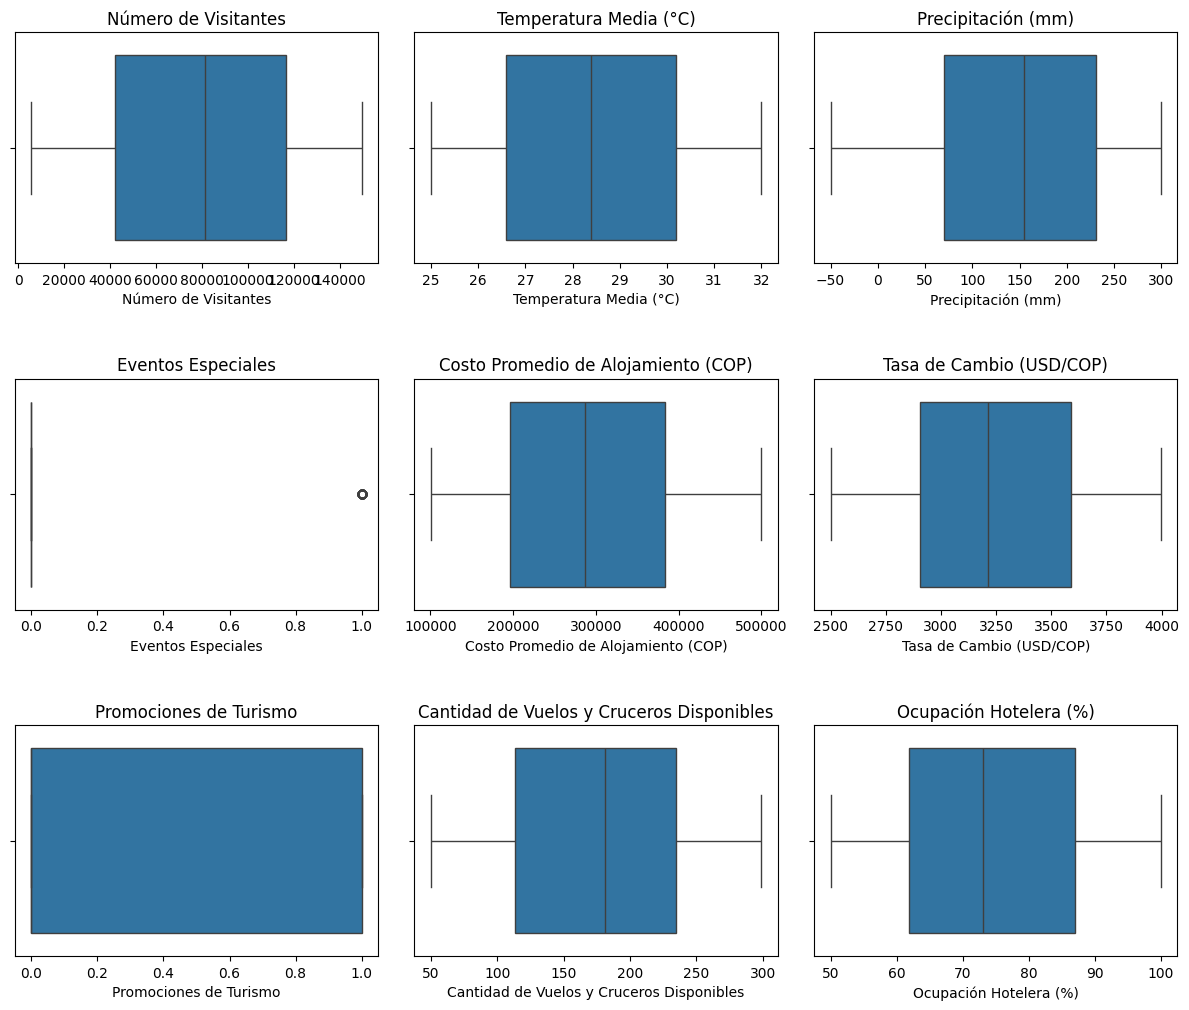

In [90]:
# Seleccionamos solo las columnas numericas
cols_num = data.select_dtypes(exclude='object').columns 

fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15,12))
fig.subplots_adjust(hspace=0.5, wspace=0.1)

# Aplanar la matriz de ejes para un acceso más fácil
ax = ax.flatten()

# Graficamos un boxplot por cada una de las columnas
for i, col in enumerate(cols_num):
    sns.boxplot(x=col, data=data, ax=ax[i])
    ax[i].set_title(col)

plt.show()

Observaciones:
- `Precipitación mm` tiene valores por debajo de 0 mm

Una precipitación negativa no tiene sentido, así que hay que corregir estos valores:

In [91]:
# Reemplzar los valores de precipitacion menores de 0 por la media
# Calcular el promedio solo con valores no negativos
mean_value = data.loc[data['Precipitación (mm)'] >= 0, 'Precipitación (mm)'].mean()

# Reemplazar los valores menores a 0 por el promedio corregido
data.loc[data['Precipitación (mm)'] < 0, 'Precipitación (mm)'] = mean_value

Guardamos el dataset limpio en un nuevo  archivo .csv:

In [92]:
ruta = '../semana_5/turistas_cartagena_data_clean.csv'
data.to_csv(ruta)

### Modelo de regresión (predecir visitantes)

In [93]:
data.describe().loc[['max', 'min']]

,Número de Visitantes,Temperatura Media (°C),Precipitación (mm),Eventos Especiales,Costo Promedio de Alojamiento (COP),Tasa de Cambio (USD/COP),Promociones de Turismo,Cantidad de Vuelos y Cruceros Disponibles,Ocupación Hotelera (%)
max,149572.0,32.0,299.4,1.0,499845.0,3996.73,1.0,299.0,100.0
min,5769.0,25.0,1.5,0.0,100781.0,2500.20,0.0,50.0,50.0


#### Dividir el conjunto de datos en entrenamiento y prueba

In [94]:
from sklearn.model_selection import train_test_split

# columnas_a_normalizar = [
#     'Temperatura Media (°C)', 'Precipitación (mm)',
#     'Costo Promedio de Alojamiento (COP)', 'Tasa de Cambio (USD/COP)',
#     'Cantidad de Vuelos y Cruceros Disponibles'
# ]

# Seleccionamos todos los atributos excepto la Fecha y la columna a predecir
X = data.drop(columns=['Fecha', 'Número de Visitantes'])
y = data['Número de Visitantes']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(396, 8) (396,)
(99, 8) (99,)


#### Escalamiento de datos (MinMaxScaler)

Hagamos primero el escalamiento del set de entrenamiento y vemos algunas características de esta operación.

In [95]:
from sklearn.preprocessing import MinMaxScaler

x_scaler = MinMaxScaler()

# fit_transform: Calcular máximos/mínimos y escalar el set de entrenamiento
X_train_scaled = x_scaler.fit_transform(X_train)

# Algunas características del escalador
print('Características del escalador ajustado:')
print(x_scaler.data_min_) 
print(x_scaler.data_max_)

# Resultado
print('\nResultado del escalamiento sobre "X_train":')
print(f'Mínimos: {X_train_scaled.min(axis=0)}')
print(f'Máximos: {X_train_scaled.max(axis=0)}')

Características del escalador ajustado:
[2.50000e+01 1.50000e+00 0.00000e+00 1.00781e+05 2.50020e+03 0.00000e+00
 5.00000e+01 5.00000e+01]
[3.20000e+01 2.99400e+02 1.00000e+00 4.95755e+05 3.99673e+03 1.00000e+00
 2.99000e+02 9.95000e+01]

Resultado del escalamiento sobre "X_train":
Mínimos: [0. 0. 0. 0. 0. 0. 0. 0.]
Máximos: [1. 1. 1. 1. 1. 1. 1. 1.]


Ahora escalemos el set `X_test` usando el método `transform()`:

In [96]:
X_test_scaled = x_scaler.transform(X_test)

print('Set de prueba: ')
print(f'Máximos: {X_test_scaled.max(axis=0)}')
print(f'Mínimos: {X_test_scaled.min(axis=0)}')

Set de prueba: 
Máximos: [1.         0.97784491 1.         1.01035511 0.99019064 1.
 1.         1.01010101]
Mínimos: [0.01428571 0.01309164 0.         0.01094756 0.00122283 0.
 0.00401606 0.01010101]


#### Entrenar el modelo

In [97]:
# Ahora si construir el modelo 
from sklearn.linear_model import LinearRegression

# Crer el modelo de regresión lineal (instancia)
lr = LinearRegression()

# Entrenar el modelo
lr.fit(X_train_scaled, y_train) # No es necesario escalar y_train

LinearRegression()

#### Generar predicciones

Hacemos predicciones con el set de pruebas escalado y exploramos las predicciones mirando el valor máximo y mínimo de los resultados

In [98]:
# Predicción con el set de prueba
y_test_pred = lr.predict(X_test_scaled) # 

print(f'Máximo: {y_test_pred.max()}')
print(f'Mínimo: {y_test_pred.min()}')

Máximo: 89159.83094408238
Mínimo: 72312.62546952753


#### Errores

In [99]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)

print(f'Error Absoluto Medio (MAE): {mae:.2f}')
print(f'Error Cuadrático Medio (MSE): {mse:.2f}')
print(f'Raíz Cuadrada del Error Cuadrático Medio (RMSE): {rmse:.2f}')

Error Absoluto Medio (MAE): 37270.58
Error Cuadrático Medio (MSE): 1770435124.06
Raíz Cuadrada del Error Cuadrático Medio (RMSE): 42076.54


In [100]:
# Calcular el promedio de los valores reales
promedio_reales = y_test.mean()

# Comparar el MAE con ese promedio
porcentaje_error_mae = (mae / promedio_reales) * 100


print(f"MAE representa un error del {porcentaje_error_mae:.2f}% respecto al promedio real de turistas.")

# Comparar el RMSE  con ese promedio
porcentaje_error_mae = (rmse / promedio_reales) * 100
print(f"RMSE representa un error del {porcentaje_error_mae:.2f}% respecto al promedio real de turistas.")


MAE representa un error del 48.09% respecto al promedio real de turistas.
RMSE representa un error del 54.29% respecto al promedio real de turistas.


#### Bloque para probar el modelo con nuevos datos ingresados por el usuario

In [101]:
X.columns

Index(['Temperatura Media (°C)', 'Precipitación (mm)', 'Eventos Especiales',
       'Costo Promedio de Alojamiento (COP)', 'Tasa de Cambio (USD/COP)',
       'Promociones de Turismo', 'Cantidad de Vuelos y Cruceros Disponibles',
       'Ocupación Hotelera (%)'],
      dtype='object')

In [102]:
# 1. Solicitar al usuario que ingrese valores de las características:

# Diccionario que va a almacenar los nuevos datos
nuevos_datos = {
    'Temperatura Media (°C)': [30],
    'Precipitación (mm)': [5],
    'Eventos Especiales': [1],
    'Costo Promedio de Alojamiento (COP)': [200000],
    'Tasa de Cambio (USD/COP)': [4000],
    'Promociones de Turismo': [1],
    'Cantidad de Vuelos y Cruceros Disponibles': [50],
    'Ocupación Hotelera (%)': [75]
}

# 2. Crear un DataFrame con los datos ingresados
nueva_data = pd.DataFrame(nuevos_datos)

# 3. Escalar los datos ingresados usando el mismo x_scaler de entrenamiento
nueva_data_escalada = x_scaler.transform(nueva_data)

# 4. Realizar la predicción con el modelo entrenado
nueva_prediccion = lr.predict(nueva_data_escalada)

# 5. Mostrar la predicción
print('\nPredicción del número de Visitantes:')
print(f'{nueva_prediccion[0]:.0f} turistas')



Predicción del número de Visitantes:
88946 turistas


### Modelo de Clasificación (Alta/Baja Ocupación Hotelera)

#### Crear variable categórica

In [103]:
data['Temporada'] = data['Ocupación Hotelera (%)'].apply(lambda x: 'Alta' if x >= 70 else 'Baja')
data[['Ocupación Hotelera (%)', 'Temporada']].head()

,Ocupación Hotelera (%),Temporada
0,88.0,Alta
1,98.4,Alta
2,72.0,Alta
3,63.9,Baja
4,89.9,Alta


Exploramos la distribución de los datos:

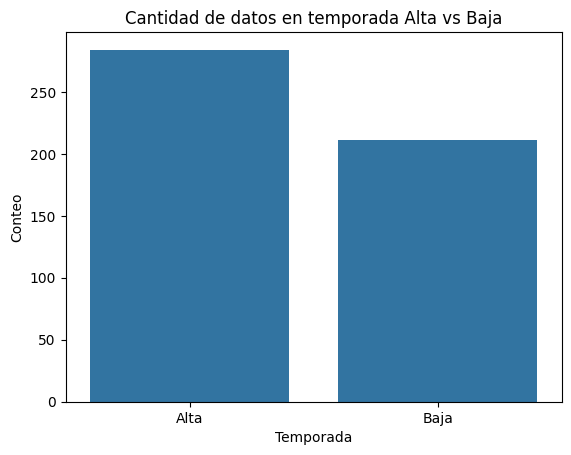

Temporada
Alta    284
Baja    211
Name: count, dtype: int64

In [104]:
sns.countplot(x='Temporada', data=data)
plt.ylabel('Conteo')
plt.title('Cantidad de datos en temporada Alta vs Baja')
plt.show()
data['Temporada'].value_counts()

In [105]:
data['Temporada'] = data['Temporada'].map({'Alta': 1, 'Baja': 0})
data.head()

,Fecha,Número de Visitantes,Temperatura Media (°C),Precipitación (mm),Eventos Especiales,Costo Promedio de Alojamiento (COP),Tasa de Cambio (USD/COP),Promociones de Turismo,Cantidad de Vuelos y Cruceros Disponibles,Ocupación Hotelera (%),Temporada
0,1982-12,126958.0,27.6,195.4,0.0,252889.0,3076.77,0.0,74.0,88.0,1
1,1983-01,136932.0,27.6,248.9,0.0,268933.0,3231.50,1.0,103.0,98.4,1
2,1983-02,108694.0,30.7,61.9,1.0,113428.0,3478.34,0.0,205.0,72.0,1
3,1983-03,124879.0,31.6,3.3,0.0,275006.0,3925.80,0.0,122.0,63.9,0
4,1983-04,115268.0,31.9,41.1,0.0,346627.0,3400.98,0.0,169.0,89.9,1


#### Random Forest Classifier

#### Dividir el conjunto de datos en entrenamiento y prueba

In [106]:
data.columns

Index(['Fecha', 'Número de Visitantes', 'Temperatura Media (°C)',
       'Precipitación (mm)', 'Eventos Especiales',
       'Costo Promedio de Alojamiento (COP)', 'Tasa de Cambio (USD/COP)',
       'Promociones de Turismo', 'Cantidad de Vuelos y Cruceros Disponibles',
       'Ocupación Hotelera (%)', 'Temporada'],
      dtype='object')

In [107]:
# columnas_entrenamiento = [
#     'Temperatura Media (°C)', 'Precipitación (mm)',
#     'Costo Promedio de Alojamiento (COP)', 'Tasa de Cambio (USD/COP)',
#     'Cantidad de Vuelos y Cruceros Disponibles'
# ]

X_class = data.drop(columns=['Fecha', 
                             'Temporada', 
                             'Ocupación Hotelera (%)',
                             'Promociones de Turismo',
                             'Eventos Especiales',
                             'Número de Visitantes'
                            ])
y_class = data['Temporada']

# Partición
Xc_train, Xc_test, yc_train, yc_test = train_test_split(X_class, y_class,
                                                    test_size=0.2,
                                                    random_state=42)

# Imprimir tamaños resultantes
print(f'Tamaño del set de entrenamiento: {Xc_train.shape} {yc_train.shape}')
print(f'Tamaño del set de prueba: {Xc_test.shape} {yc_test.shape}')

Tamaño del set de entrenamiento: (396, 5) (396,)
Tamaño del set de prueba: (99, 5) (99,)


#### Entrenar el modelo de Bosque Aleatorio


El entrenamiento sigue la misma lógica usada epara otros modelos de Scikit-Learn:

1. Crear instancia del modelo
2. Enrenar usando 'fit()' y el set de entrenamiento

Crearemos un modelo con los hiper-parámetros por defecto:

In [108]:
from sklearn.ensemble import RandomForestClassifier

# Crear el modelo de clasificación con RandomForest (instancia)
model_class = RandomForestClassifier(random_state=42,
                                     oob_score=True)

# Entrenar el modelo, no es necesario escalar los valores
model_class.fit(Xc_train, yc_train)

RandomForestClassifier(oob_score=True, random_state=42)

#### Generar Predicciones

In [109]:
# Predicción con el set de prueba
yc_test_pred = model_class.predict(Xc_test) 

#### Métricas para clasificación

In [110]:
from sklearn.metrics import accuracy_score, classification_report

# Accuracy: porcentaje de predicciones correctas.
# Precision: cuántos positivos predichos realmente lo son.
# Recall: cuántos positivos reales se detectaron.
# F1-score: balance entre precision y recall.

print("Accuracy:", accuracy_score(yc_test, yc_test_pred))
print("\nReporte de Clasificación:")
print(classification_report(yc_test, yc_test_pred))

Accuracy: 0.5858585858585859

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.56      0.34      0.42        44
           1       0.60      0.78      0.68        55

    accuracy                           0.59        99
   macro avg       0.58      0.56      0.55        99
weighted avg       0.58      0.59      0.56        99



#### Evaluación del nivel de importancia de las características


Importancia de las Características sin Año y Mes:
                                      Columna  Importancia
1                         Precipitación (mm)     0.217055
3                   Tasa de Cambio (USD/COP)     0.205328
2        Costo Promedio de Alojamiento (COP)     0.205224
4  Cantidad de Vuelos y Cruceros Disponibles     0.200271
0                     Temperatura Media (°C)     0.172122


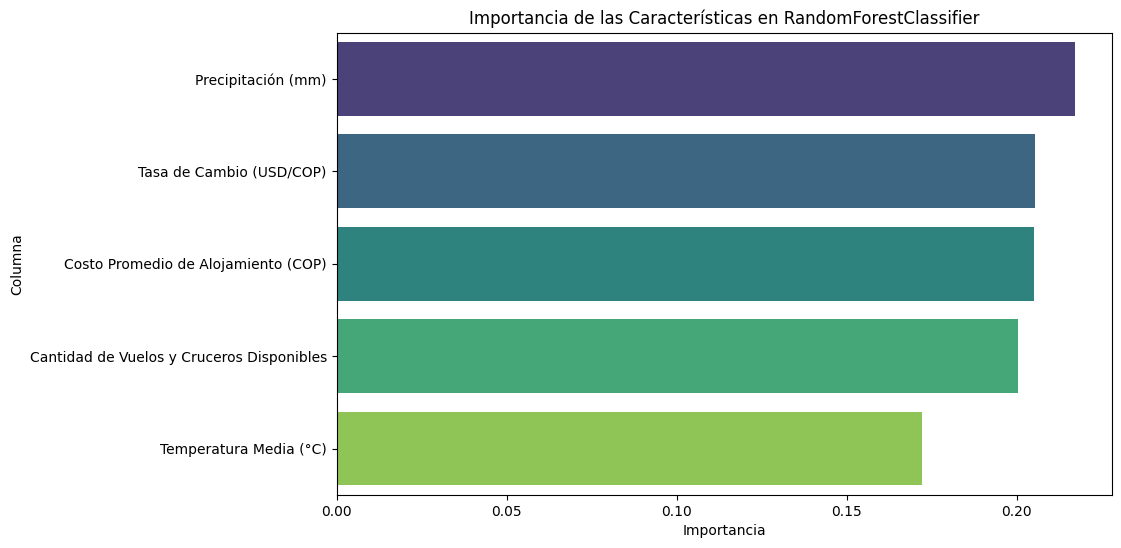

In [111]:
importancias = model_class.feature_importances_
nombres_columnas = Xc_train.columns
importancia_caracteristicas = pd.DataFrame({'Columna': nombres_columnas, 'Importancia': importancias})
importancia_caracteristicas = importancia_caracteristicas.sort_values('Importancia', ascending=False)

print("\nImportancia de las Características sin Año y Mes:\n", importancia_caracteristicas)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importancia', y='Columna', data=importancia_caracteristicas, 
            hue='Columna', palette="viridis", legend=False)
plt.title('Importancia de las Características en RandomForestClassifier')
plt.xlabel('Importancia')
plt.ylabel('Columna')
plt.show()

In [112]:
nuevos_datos_class = {
    # 'Número de Visitantes': [130000],
    'Temperatura Media (°C)': [30],
    'Precipitación (mm)': [10],
    # 'Eventos Especiales': [1],
    'Costo Promedio de Alojamiento (COP)': [180000],
    'Tasa de Cambio (USD/COP)': [4100],
    # 'Promociones de Turismo': [1],
    'Cantidad de Vuelos y Cruceros Disponibles': [60]
}

# 2. Crear un DataFrame con los datos ingresados
nueva_data_class = pd.DataFrame(nuevos_datos_class)

# # 3. Escalar los datos ingresados usando el mismo x_scaler de entrenamiento
# nueva_data_escalada = x_scaler.transform(nueva_data)

# 4. Realizar la predicción con el modelo entrenado
nueva_prediccion_class = model_class.predict(nueva_data_class)

# Cambiamos nuevamente el 1 por Alta y el 0 por Baja para mayor comprensión del resultado
nueva_prediccion_class_texto = pd.Series(nueva_prediccion_class).map({1: 'Alta', 0: 'Baja'})

# 5. Mostrar la predicción
print('\nPredicción de la Temporada:')
print(f'{nueva_prediccion_class_texto[0]}')


Predicción de la Temporada:
Baja


## Modelos con Año y Mes

### Incluir Año y Mes

Vamos a **extraer el año y el mes** de la columna `Fecha` para crear dos nuevas columnas:

- `Año`: Para detectar si el turismo ha crecido o disminuido a lo largo del tiempo.
- `Mes`: Para identificar patrones repetitivos como temporadas altas o bajas.

In [113]:
# Convertir 'Fecha' a tipo datetime y crear nuevas columnas
data['Fecha'] = pd.to_datetime(data['Fecha'], format='%Y-%m')
data['Año'] = data['Fecha'].dt.year
data['Mes'] = data['Fecha'].dt.month

Verificamos si el tipo de dato ha cambiado e imprimimos las columnas `Fecha`, `Año` y `Mes` para observarlo:

In [114]:

print(data.dtypes)
data[['Fecha', 'Año', 'Mes']]

Fecha                                        datetime64[ns]
Número de Visitantes                                float64
Temperatura Media (°C)                              float64
Precipitación (mm)                                  float64
Eventos Especiales                                  float64
Costo Promedio de Alojamiento (COP)                 float64
Tasa de Cambio (USD/COP)                            float64
Promociones de Turismo                              float64
Cantidad de Vuelos y Cruceros Disponibles           float64
Ocupación Hotelera (%)                              float64
Temporada                                             int64
Año                                                   int32
Mes                                                   int32
dtype: object


,Fecha,Año,Mes
0,1982-12-01,1982,12
1,1983-01-01,1983,1
2,1983-02-01,1983,2
3,1983-03-01,1983,3
4,1983-04-01,1983,4
...,...,...,...
495,2023-08-01,2023,8
496,2023-09-01,2023,9
497,2023-10-01,2023,10
498,2023-11-01,2023,11


### Modelo de regresión con Año y Mes

In [115]:
data.describe().loc[['max', 'min']]

,Fecha,Número de Visitantes,Temperatura Media (°C),Precipitación (mm),Eventos Especiales,Costo Promedio de Alojamiento (COP),Tasa de Cambio (USD/COP),Promociones de Turismo,Cantidad de Vuelos y Cruceros Disponibles,Ocupación Hotelera (%),Temporada,Año,Mes
max,2023-12-01 00:00:00,149572.0,32.0,299.4,1.0,499845.0,3996.73,1.0,299.0,100.0,1.0,2023.0,12.0
min,1982-12-01 00:00:00,5769.0,25.0,1.5,0.0,100781.0,2500.20,0.0,50.0,50.0,0.0,1982.0,1.0


#### Dividir el conjunto de datos en entrenamiento y prueba

In [116]:
from sklearn.model_selection import train_test_split

# columnas_a_normalizar = [
#     'Temperatura Media (°C)', 'Precipitación (mm)',
#     'Costo Promedio de Alojamiento (COP)', 'Tasa de Cambio (USD/COP)',
#     'Cantidad de Vuelos y Cruceros Disponibles', 'Año', 'Mes'
# ]

X = data.drop(columns=['Fecha', 'Número de Visitantes', 'Temporada'])
y = data['Número de Visitantes']

X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

print(f'Tamaño del set de entrenamiento: {X_train1.shape} {y_train1.shape}')
print(f'Tamaño del set de prueba: {X_test1.shape} {y_test1.shape}')

Tamaño del set de entrenamiento: (396, 10) (396,)
Tamaño del set de prueba: (99, 10) (99,)


#### Escalamiento de datos (MinMaxScaler)

In [117]:
from sklearn.preprocessing import MinMaxScaler

x1_scaler = MinMaxScaler()

# fit_transform: Calcular máximos/mínimos y escalar el set de entrenamiento
X_train1_scaled = x1_scaler.fit_transform(X_train1)

# Algunas características del escalador
print('Características del escalador ajustado:')
print(x1_scaler.data_min_) 
print(x1_scaler.data_max_)

# Resultado
print('\nResultado del escalamiento sobre "X_train":')
print(f'Mínimos: {X_train1_scaled.min(axis=0)}')
print(f'Máximos: {X_train1_scaled.max(axis=0)}')

Características del escalador ajustado:
[2.50000e+01 1.50000e+00 0.00000e+00 1.00781e+05 2.50020e+03 0.00000e+00
 5.00000e+01 5.00000e+01 1.98300e+03 1.00000e+00]
[3.20000e+01 2.99400e+02 1.00000e+00 4.95755e+05 3.99673e+03 1.00000e+00
 2.99000e+02 9.95000e+01 2.02300e+03 1.20000e+01]

Resultado del escalamiento sobre "X_train":
Mínimos: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Máximos: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


Ahora escalemos el set `X_test` usando el método `transform()`:

In [118]:
X_test1_scaled = x1_scaler.transform(X_test1)

print('Set de prueba: ')
print(f'Máximos: {X_test1_scaled.max(axis=0)}')
print(f'Mínimos: {X_test1_scaled.min(axis=0)}')

Set de prueba: 
Máximos: [1.         0.97784491 1.         1.01035511 0.99019064 1.
 1.         1.01010101 1.         1.        ]
Mínimos: [ 0.01428571  0.01309164  0.          0.01094756  0.00122283  0.
  0.00401606  0.01010101 -0.025       0.        ]


#### Entrenar el modelo

In [119]:
# Ahora si construir el modelo 
from sklearn.linear_model import LinearRegression

# Crer el modelo de regresión lineal (instancia)
lr1 = LinearRegression()

# Entrenar el modelo
lr1.fit(X_train1_scaled, y_train1) # No es necesario escalar y_train

LinearRegression()

#### Generar predicciones

In [120]:
# Predicción con el set de prueba
y_test1_pred = lr1.predict(X_test1_scaled) # 

print(f'Máximo: {y_test1_pred.max()}')
print(f'Mínimo: {y_test1_pred.min()}')

Máximo: 89000.6362091118
Mínimo: 68113.18863561224


#### Errores

In [121]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae_con = mean_absolute_error(y_test1, y_test1_pred)
mse_con = mean_squared_error(y_test1, y_test1_pred)
rmse_con = np.sqrt(mse_con)

print(f'Error Absoluto Medio (MAE): {mae_con:.2f}')
print(f'Error Cuadrático Medio (MSE): {mse_con:.2f}')
print(f'Raíz Cuadrada del Error Cuadrático Medio (RMSE): {rmse_con:.2f}')

Error Absoluto Medio (MAE): 37286.34
Error Cuadrático Medio (MSE): 1772616484.48
Raíz Cuadrada del Error Cuadrático Medio (RMSE): 42102.45


In [122]:
# Calcular el promedio de los valores reales
promedio_reales1 = y_test1.mean()

# Comparar el MAE con ese promedio
porcentaje_error_mae_con = (mae_con / promedio_reales1) * 100


print(f"MAE representa un error del {porcentaje_error_mae_con:.2f}% respecto al promedio real de turistas.")

# Comparar el RMSE  con ese promedio
porcentaje_error_mae_con = (rmse_con / promedio_reales1) * 100
print(f"RMSE representa un error del {porcentaje_error_mae_con:.2f}% respecto al promedio real de turistas.")

MAE representa un error del 48.11% respecto al promedio real de turistas.
RMSE representa un error del 54.33% respecto al promedio real de turistas.


### Modelo de Clasificación con Año y Mes

#### Random Forest Classifier con Año y Mes

#### Dividir el conjunto de datos en entrenamiento y prueba

In [123]:
data.columns

Index(['Fecha', 'Número de Visitantes', 'Temperatura Media (°C)',
       'Precipitación (mm)', 'Eventos Especiales',
       'Costo Promedio de Alojamiento (COP)', 'Tasa de Cambio (USD/COP)',
       'Promociones de Turismo', 'Cantidad de Vuelos y Cruceros Disponibles',
       'Ocupación Hotelera (%)', 'Temporada', 'Año', 'Mes'],
      dtype='object')

In [124]:
# columnas_entrenamiento = [
#     'Temperatura Media (°C)', 'Precipitación (mm)',
#     'Costo Promedio de Alojamiento (COP)', 'Tasa de Cambio (USD/COP)',
#     'Cantidad de Vuelos y Cruceros Disponibles', 'Año', 'Mes'
# ]

X_class = data.drop(columns=['Fecha', 
                             'Temporada', 
                             'Ocupación Hotelera (%)',
                             'Eventos Especiales',
                             'Promociones de Turismo',
                             'Número de Visitantes'
                             ])
y_class = data['Temporada']

# Partición
Xc_train1, Xc_test1, yc_train1, yc_test1 = train_test_split(X_class, y_class,
                                                    test_size=0.2,
                                                    random_state=42)

# Imprimir tamaños resultantes
print(f'Tamaño del set de entrenamiento: {Xc_train1.shape} {yc_train1.shape}')
print(f'Tamaño del set de prueba: {Xc_test1.shape} {yc_test1.shape}')

Tamaño del set de entrenamiento: (396, 7) (396,)
Tamaño del set de prueba: (99, 7) (99,)


#### Entrenar el modelo de Bosque Aleatorio

In [125]:
from sklearn.ensemble import RandomForestClassifier

# Crear el modelo de clasificación con RandomForest (instancia)
model_class1 = RandomForestClassifier(random_state=42,
                                     oob_score=True)

# Entrenar el modelo, no es necesario escalar los valores
model_class1.fit(Xc_train1, yc_train1)

RandomForestClassifier(oob_score=True, random_state=42)

#### Generar Predicciones

In [126]:
# Predicción con el set de prueba
yc_test1_pred = model_class1.predict(Xc_test1) 

#### Métricas para clasificación

In [127]:
from sklearn.metrics import accuracy_score, classification_report

# Accuracy: porcentaje de predicciones correctas.
# Precision: cuántos positivos predichos realmente lo son.
# Recall: cuántos positivos reales se detectaron.
# F1-score: balance entre precision y recall.

print("Accuracy:", accuracy_score(yc_test1, yc_test1_pred))
print("\nReporte de Clasificación:")
print(classification_report(yc_test1, yc_test1_pred))

Accuracy: 0.46464646464646464

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.37      0.30      0.33        44
           1       0.52      0.60      0.55        55

    accuracy                           0.46        99
   macro avg       0.44      0.45      0.44        99
weighted avg       0.45      0.46      0.45        99



#### Evaluación del nivel de importancia de las características


Importancia de las Características con Año y Mes:
                                      Columna  Importancia
2        Costo Promedio de Alojamiento (COP)     0.163902
3                   Tasa de Cambio (USD/COP)     0.156151
1                         Precipitación (mm)     0.155981
4  Cantidad de Vuelos y Cruceros Disponibles     0.148463
0                     Temperatura Media (°C)     0.142863
5                                        Año     0.139077
6                                        Mes     0.093563


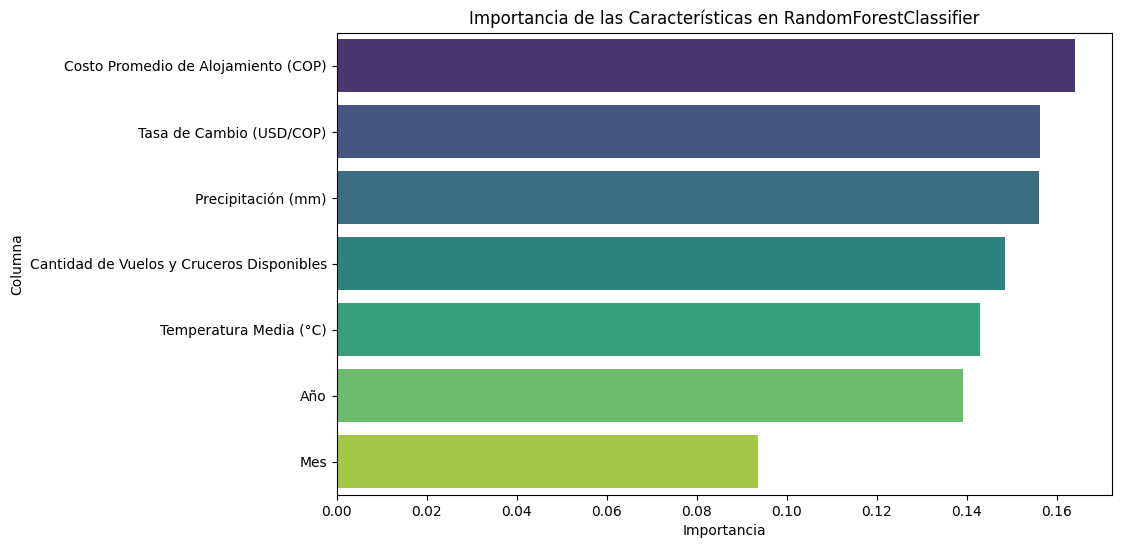

In [128]:
importancias = model_class1.feature_importances_
nombres_columnas = Xc_train1.columns
importancia_caracteristicas = pd.DataFrame({'Columna': nombres_columnas, 'Importancia': importancias})
importancia_caracteristicas = importancia_caracteristicas.sort_values('Importancia', ascending=False)

print("\nImportancia de las Características con Año y Mes:\n", importancia_caracteristicas)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importancia', y='Columna', data=importancia_caracteristicas, 
            hue='Columna', palette="viridis", legend=False)
plt.title('Importancia de las Características en RandomForestClassifier')
plt.xlabel('Importancia')
plt.ylabel('Columna')
plt.show()

## Celdas de Resultados

### Tablas comparativas

#### Tabla comparación - Regresión

In [ ]:
print(f'Error sin Año y Mes MAE: {mae:.2f}')
print(f'Error con Año y Mes MAE: {mae_con:.2f}')
print(f'\nError sin Año y Mes RMSE: {rmse:.2f}')
print(f'Error con Año y Mes RMSE: {rmse_con:.2f}')

| **Métrica** | **Sin Año/Mes** | **Con Año/Mes** | **Mejoró?** |
|-------|-----------|--------|----------|
| **MAE** | 37270.58 | 37286.34 | No |
| **RMSE** | 42076.54 | 42102.45 | No |
| **% Error MAE** | 48.09% | 48.11% | No |
| **% Error RMSE** | 54.29% | 54.33% | No |

#### Tabla de comparación - Clasificación

In [ ]:
print(f'Accuracy sin Año y Mes: {accuracy_score(yc_test, yc_test_pred):.2f}')
print(f'Accuracy con Año y Mes: {accuracy_score(yc_test1, yc_test1_pred):.2f}')

print("\nReporte de Clasificación sin Año y Mes:")
print(classification_report(yc_test, yc_test_pred))
print("Reporte de Clasificación con Año y Mes:")
print(classification_report(yc_test1, yc_test1_pred))

| **Métrica** | **Sin Año/Mes** | **Con Año/Mes** | **Mejoró?** |
|-------|-----------|--------|----------|
| **Accuracy** | 0.51 | 0.55 | Si |
| **F1-score(Alta)** | 0.61 | 0.63 | Si |
| **F1-score(Baja)** | 0.31 | 0.42 | Si |
| **Precision promedio** | 0.47 | 0.53 | Si |
| **Recall promedio** | 0.48 | 0.53 | Si |

### Refexión final

1. Qué efecto tuvo la inclusión de Año y Mes en el modelo de regresión?

- En el modelo de Regresión Lineal, incluir el Año y el Mes, no representó una mejora significativa en el rendimiento.

2. Qué efecto tuvo en el modelo de clasificación?

- En el modelo de clasificación con RandomForestClassifier, incluir el Año y el Mes tuvo una ligera mejora en el accuracy de 0.51 a 0.55 y también en el F1-score en las predicciones de temporada 'Alta' y 'Baja'.

3. Por qué crees que ocurrió esa diferencia?

- En el modelo de regresión lineal no hubo diferencia debido a su limitación para encontrar algunos patrones en el Año y el Mes. Es probable también que con las otras características ya se tuviera una buena predicciåón del número de visitantes.
El modelo de clasificación RandomForesClassifier, al ser más robusto y no lineal pudo aprovechar un poco mejor los datos de Año y Mes. Adicionalmente la clasificación puede ser más sensible a valores de tiempo que la predicción nuérica en la regresión.

4. En qué tipo de problemas reales crees que Año y Mes serían especialmente útiles?

- Pueden ser útiles en problemas donde el objetivo se relaciona con la época o temporada. Algunos ejemplos podrían ser:
    - Predicción de ventas: Ver que productos se venden más en época de vacaciones.
    - Predicción de generación de energía solar: Ver en que meses del año se genera mayor cantidad de energía.
    - Predicción del clima: Predecir temporada de vientos, lluvias o sequías.

5. Qué aprendizaje te deja este ejercicio sobre el uso de variables temporales en Machine Learning?
- Las variables temporales pueden ser útiles pero su utilidad depende del contexto de uso y el modelo utilizado.
- Añadir información del tiempo, no siempre mejora el rendimiento del modelo.
- El modelo Random Forest al ser mas robusto aprovecha de mejor manera los datos temporales.
